# Knn based classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report as cr
from scipy.spatial import distance as dist
diff_dist=[]

K-Nearest Neighbors is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

It is widely disposable in real-life scenarios since it is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data (as opposed to other algorithms such as GMM, which assume a Gaussian distribution of the given data).

Algorithm Let m be the number of training data samples. Let p be an unknown point.

1) Store the training samples in an array of data points arr[]. This means each element of this array represents a tuple (x, y).

2) for i=0 to m: Calculate (Euclidean/Manhattan/Cosine) distance d(arr[i], p).

3) Make set S of K smallest distances obtained. Each of these distances corresponds to an already classified data point.

4)Return the majority label among S.

# Method 1
Using list of list wherein you create the list of all the attributes present in dataset but there might be a case wherein some of the attibutes are not present in training datatset and some are absent in test dataset. Using Transpose and reindex it an be handled.

k = 3

Distance = Euclidean

In [2]:
#Import dataset
dataset=pd.read_csv('train.csv',header=None)
test_data=pd.read_csv('test.csv',header=None) 
label_data=pd.read_csv('test_labels.csv',header=None)


In [3]:
label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
0    1000 non-null object
dtypes: object(1)
memory usage: 7.9+ KB


In [4]:
#Location x is independent(label) and y is independent(vales)
x=dataset.iloc[:,:1]
y=dataset.iloc[:,1:]


In [5]:
train_data=pd.DataFrame(y)
test_data_df=pd.DataFrame(test_data)

In [6]:
train_data.drop(dataset.columns[[11]], axis = 1, inplace = True) 
test_data_df.drop(dataset.columns[[10]], axis = 1, inplace = True) 

In [7]:
feat=[['s','k','f','x','c','b'],['f','g','y','s'],['n','b','c','g','r','p','u','e','w','y'],['t','f'],['a','l','c','y','f','m','n','p','s'],
      ['a','d','f','n'],['c','w','d'],['b','n'],['k','n','b','h','g','r','o','p','u','e','w','y'],['e','t'],
      ['f','y','k','s'],['f','y','k','s'],['n','b','c','g','o','p','e','w','y'],['n','b','c','g','o','p','e','w','y'],
      ['p','u'],['n','o','w','y'],['n','o','t'],['c','e','f','l','n','p','s','z'],['k','n','b','h','r','o','u','w','y'],
      ['a','c','n','s','v','y'],['g','l','m','p','u','w','d'] ]
     

In [8]:
df=pd.DataFrame(columns=None)


In [9]:
for i in range(21):
    dummies1=pd.get_dummies(train_data.iloc[:,i],prefix='',prefix_sep='')
    dummies2=dummies1.T.reindex(feat[i]).T.fillna(0)
    df=pd.concat([df,dummies2],axis=1,sort=False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4496 entries, 0 to 4495
Columns: 119 entries, s to d
dtypes: float64(17), uint8(102)
memory usage: 1.0 MB


In [11]:
df2=pd.DataFrame(columns=None)

In [12]:
for i in range(21):
    dummies3=pd.get_dummies(test_data.iloc[:,i],prefix='',prefix_sep='')
    dummies4=dummies3.T.reindex(feat[i]).T.fillna(0)
    df2=pd.concat([df2,dummies4],axis=1,sort=False)

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 119 entries, s to d
dtypes: float64(72), uint8(47)
memory usage: 608.5 KB


In [14]:
#Putting the first row into label and second into pixels
pixel=pd.DataFrame(df).to_numpy()
label=pd.DataFrame(x).to_numpy()
test_pixel=pd.DataFrame(df2).to_numpy()
test_label=pd.DataFrame(label_data).to_numpy()

label_list=[]
for i in range(0,1000):
    lb=test_label[i]
    label_list.append(lb)
# label_list

In [15]:
list2=[]
for i in range(0,1000):
    list1=[]
    neighbors = []
    m=test_pixel[i]
    for j in range(1,4469):
        l=pixel[j]
        q=label[j]
        distance = np.linalg.norm(l-m)
        list1.append((q,distance))
        
    list1.sort(key=lambda ele:ele[1])
    k=3
    for p in range(k):
        neighbors.append(list1[p][0])

    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count) 
    list2.append(prediction)

            
    
print('The accuracy using euclidean distance with k=5 :')    
print (accuracy_score(label_list,list2))  
aa=accuracy_score(label_list,list2)
diff_dist.append(aa)
    
# list2    

The accuracy using euclidean distance with k=5 :
0.991


A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

The Confusion Matrix for euclidean distance with k=5:


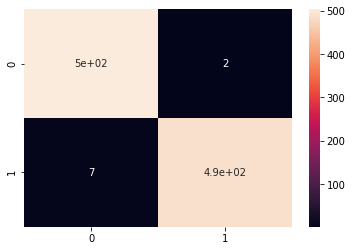

In [16]:
print('The Confusion Matrix for euclidean distance with k=5:')
import seaborn as sns
import matplotlib.pyplot as plt     
cm=confusion_matrix(label_list,list2)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 

# Precision

To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive (small number of FP).

# Recall

Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples.

High Recall indicates the class is correctly recognized (small number of FN). High recall, low precision:This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

Low recall, high precision:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)

# F-Measure

Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or Recall.

# Report shown with K:5 for euclidean distance

In [17]:
print(cr(label_list , list2))

              precision    recall  f1-score   support

           e       0.99      1.00      0.99       505
           p       1.00      0.99      0.99       495

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [18]:
k_range = range(1,50)
scores = []
for k in k_range:
    scores.append(accuracy_score(label_list,list2))
print(scores)    

[0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991]


Text(0, 0.5, 'Testing Accuracy')

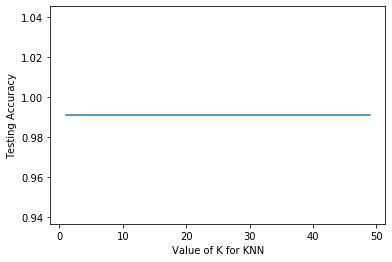

In [19]:

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

 # Method 2
 We solve the problem of dummy variables when not all categories are present by just the mannually appending the row wherein we first rectify which attributes are present in train data but absent in test and just append those in test data.
 
 K = 5
 
 Distance = Manhattan

In [20]:
 #Import dataset
dataset=pd.read_csv('train.csv',header=None)
test_data=pd.read_csv('test.csv',header=None) 
label_data=pd.read_csv('test_labels.csv',header=None)
# label_data

In [21]:
#Location x is independent(label) and y is independent(vales)
x=dataset.iloc[:,:1]
y=dataset.iloc[:,1:]


In [22]:
train_data=pd.DataFrame(y)
test_data_df=pd.DataFrame(test_data)

In [23]:
test_data1=pd.DataFrame({0:['x'],1:['g'],2:['g'],3:['f'],4:['f'],5:['f'],6:['c'],7:['b'],8:['p'],9:['e'],10:['b'],11:['k'],12:['k'],13:['y'],14:['p'],15:['p'],16:['y'],17:['o'],18:['l'],19:['h'],20:['v'],21:['g']})

In [24]:
dd=test_data_df.append(test_data1)

In [25]:
train_data.drop(dataset.columns[[11]], axis = 1, inplace = True) 
dd.drop(test_data.columns[[10]], axis = 1, inplace= True)


In [26]:
data_after_encode=pd.get_dummies(train_data)
data_after_encode.shape    
    

(4496, 112)

In [27]:
test_data_after_encode=pd.get_dummies(dd)
test_data_after_encode.shape

(1001, 112)

In [28]:
#Putting the first row into label and second into pixels
pixel=pd.DataFrame(data_after_encode).to_numpy()
label=pd.DataFrame(x).to_numpy()
test_pixel=pd.DataFrame(test_data_after_encode).to_numpy()
test_label=pd.DataFrame(label_data).to_numpy()

label_list=[]
for i in range(0,1000):
    lb=test_label[i]
    label_list.append(lb)

In [29]:
list2=[]
for i in range(0,1000):
    list1=[]
    neighbors = []
    m=test_pixel[i]
    for j in range(1,4496):
        l=pixel[j]
        q=label[j]
        distance = dist.cityblock(l,m)
        list1.append((q,distance))
        
    list1.sort(key=lambda ele:ele[1])
    k=5
    for p in range(k):
        neighbors.append(list1[p][0])

    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count) 
    list2.append(prediction)
    
   
print('The accuracy using euclidean distance with k=5 :')    
print (accuracy_score(label_list,list2)*100) 
bb=accuracy_score(label_list,list2)
diff_dist.append(bb)

The accuracy using euclidean distance with k=5 :
100.0


The Confusion Matrix for Manhattan distance with k=5:


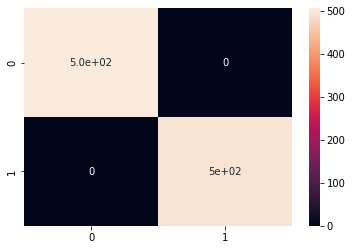

In [30]:
print('The Confusion Matrix for Manhattan distance with k=5:')
import seaborn as sns
import matplotlib.pyplot as plt     
cm=confusion_matrix(label_list,list2)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 

# Report shown with K:5 for Manhattan distance

In [31]:
print(cr(label_list , list2))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       505
           p       1.00      1.00      1.00       495

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [32]:
k_range = range(1,50)
scores = []
for k in k_range:
    scores.append(accuracy_score(label_list,list2))
print(scores)  

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Testing Accuracy')

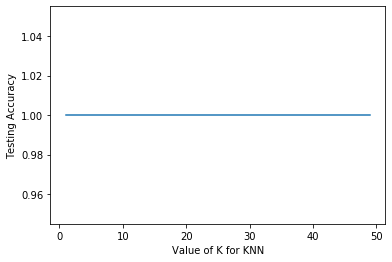

In [33]:
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Method 3

Here in this method we merge train and test dataset and then we apply one hot encoding. While merging we indicate test rows with '1' and train rows with '0', we do this by adding one extra coloumn after we have merged test and train. We carry out this operation to make sure both train and test have same number of coloumns.

K = 3

Distance = Cosine

In [34]:
dataset=pd.read_csv('train.csv',header=None)
test_data=pd.read_csv('test.csv',header=None)
label_data=pd.read_csv('test_labels.csv',header=None)

In [35]:
#x represents first coloumn and y represents all remaining coloumns
x=dataset.iloc[:,:1]
y=dataset.iloc[:,1:]

In [36]:
train_data=pd.DataFrame(y)
test_data_df=pd.DataFrame(test_data)

In [37]:
train_data.drop(dataset.columns[[11]], axis = 1, inplace = True) 
test_data_df.drop(test_data.columns[[10]], axis = 1, inplace= True)

In [38]:
temp = pd.get_dummies(pd.concat([train_data,test_data_df],keys=[0,1]))

In [39]:
Xtrain,Xtest = temp.xs(0),temp.xs(1)

In [40]:
data_after_encode=pd.get_dummies(Xtrain).shape
data_after_encode  

(4496, 191)

In [41]:
test_data_after_encode=pd.get_dummies(Xtest)
test_data_after_encode.shape

(1000, 191)

In [42]:
pixel=pd.DataFrame(Xtrain).to_numpy()
label=pd.DataFrame(x).to_numpy()
test_pixel=pd.DataFrame(Xtest).to_numpy()
test_label=pd.DataFrame(label_data).to_numpy()

label_list=[]
for i in range(0,1000):
    lb=test_label[i]
    
    label_list.append(lb)

In [43]:

list2=[]
for i in range(0,1000):
    list1=[]
    neighbors = []
    m=test_pixel[i]
    for j in range(1,4496):
        l=pixel[j]
        q=label[j]
        distance =dist.cosine(l,m)
        list1.append((q,distance))
        
    list1.sort(key=lambda ele:ele[1])
    k=3
    for p in range(k):
        neighbors.append(list1[p][0])

    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count) 
    list2.append(prediction)
    
    
        
print('The accuracy using cosine distance with k=5 :')     
print (accuracy_score(label_list,list2)*100) 
cc=accuracy_score(label_list,list2)
diff_dist.append(cc)

The accuracy using cosine distance with k=5 :
54.300000000000004


The Confusion Matrix for Manhattan distance with k=5:


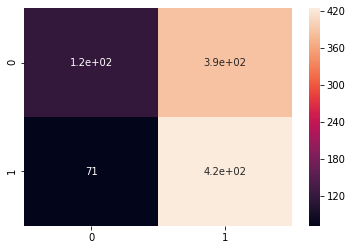

In [44]:
print('The Confusion Matrix for Manhattan distance with k=5:')
import seaborn as sns
import matplotlib.pyplot as plt     
cm=confusion_matrix(label_list,list2)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 

# Report shown with K:3 for Cosine distance

In [45]:
print(cr(label_list , list2))

              precision    recall  f1-score   support

           e       0.63      0.24      0.34       505
           p       0.52      0.86      0.65       495

    accuracy                           0.54      1000
   macro avg       0.57      0.55      0.50      1000
weighted avg       0.58      0.54      0.49      1000



In [46]:
k_range = range(1,50)
scores = []
for k in k_range:
    scores.append(accuracy_score(label_list,list2))
print(scores)  

[0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543, 0.543]


Text(0.5, 0, 'Value of K for KNN on cosine distance')

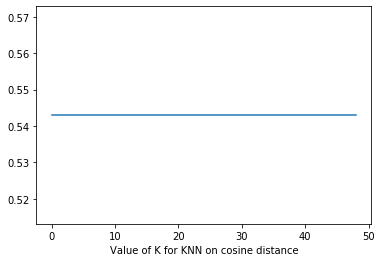

In [49]:
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN on ')
plt.ylabel('Testing Accuracy')

In [48]:

print(diff_dist)  

[<function accuracy_score at 0x7f8bdfe67378>, <function accuracy_score at 0x7f8bdfe67378>, <function accuracy_score at 0x7f8bdfe67378>]


Text(0, 0.5, 'Testing Accuracy')

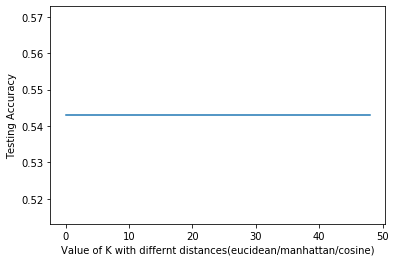

In [52]:
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(scores)
plt.xlabel('Value of K with differnt distances(eucidean/manhattan/cosine)')
plt.ylabel('Testing Accuracy')